# Ryzyko rynkowe
## Importy

In [1]:
#pip install numpy pandas matplotlib yfinance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

## Pobranie danych przez API

Źródło danych Yahoo Finance: https://finance.yahoo.com/chart/NVDA.

Zbiór cen akcji NVIDIA Corporation (NVDA) od początku 2023 roku zawiera kolumny:
- Adj Close: skorygowana cena zamknięcia.
- Close: cena zamknięcia.
- High: najwyższa cena w ciągu dnia.
- Low: najniższa cena w ciągu dnia.
- Open: cena otwarcia.
- Volume: liczba akcji, która zmieniła właściciela tego dnia.

In [2]:
data = yf.download("NVDA", start="2023-01-01", end="2023-12-31")

[*********************100%***********************]  1 of 1 completed


In [3]:
data.to_csv("data/NVDA_data.csv")

## Eksploracyjna analiza danych

In [4]:
data = pd.read_csv("data/NVDA_data.csv", header=[0, 1], index_col=0, parse_dates=True)
data.shape

(250, 6)

In [5]:
data.columns

MultiIndex([('Adj Close', 'NVDA'),
            (    'Close', 'NVDA'),
            (     'High', 'NVDA'),
            (      'Low', 'NVDA'),
            (     'Open', 'NVDA'),
            (   'Volume', 'NVDA')],
           names=['Price', 'Ticker'])

In [6]:
data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,,
2023-01-03 00:00:00+00:00,14.305581,14.315,14.996,14.096,14.851,401277000
2023-01-04 00:00:00+00:00,14.739296,14.749,14.853,14.241,14.567,431324000
2023-01-05 00:00:00+00:00,14.255614,14.265,14.564,14.148,14.491,389168000
2023-01-06 00:00:00+00:00,14.849223,14.859,15.010,14.034,14.474,405044000
2023-01-09 00:00:00+00:00,15.617716,15.628,16.056,15.141,15.284,504231000


Spłaszczenie oznaczeń kolumn:

In [7]:
data.columns = ["_".join(col).strip() for col in data.columns]
data.head()

,Adj Close_NVDA,Close_NVDA,High_NVDA,Low_NVDA,Open_NVDA,Volume_NVDA
Date,,,,,,
2023-01-03 00:00:00+00:00,14.305581,14.315,14.996,14.096,14.851,401277000
2023-01-04 00:00:00+00:00,14.739296,14.749,14.853,14.241,14.567,431324000
2023-01-05 00:00:00+00:00,14.255614,14.265,14.564,14.148,14.491,389168000
2023-01-06 00:00:00+00:00,14.849223,14.859,15.010,14.034,14.474,405044000
2023-01-09 00:00:00+00:00,15.617716,15.628,16.056,15.141,15.284,504231000


In [8]:
data.tail()

,Adj Close_NVDA,Close_NVDA,High_NVDA,Low_NVDA,Open_NVDA,Volume_NVDA
Date,,,,,,
2023-12-22 00:00:00+00:00,48.819527,48.830002,49.382999,48.466999,49.195000,252507000
2023-12-26 00:00:00+00:00,49.268425,49.278999,49.599998,48.959999,48.967999,244200000
2023-12-27 00:00:00+00:00,49.406395,49.417000,49.680000,49.084999,49.511002,233648000
2023-12-28 00:00:00+00:00,49.511375,49.521999,49.883999,49.411999,49.643002,246587000
2023-12-29 00:00:00+00:00,49.511375,49.521999,49.997002,48.750999,49.813000,389293000


Po wyświetleniu paru pierwszych i ostatnich wierszy widzimy, że brakuje obserwacji z niektórych dni (mamy 250 obserwacji w ciągu całego 2023 roku).

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2023-01-03 00:00:00+00:00 to 2023-12-29 00:00:00+00:00
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Adj Close_NVDA  250 non-null    float64
 1   Close_NVDA      250 non-null    float64
 2   High_NVDA       250 non-null    float64
 3   Low_NVDA        250 non-null    float64
 4   Open_NVDA       250 non-null    float64
 5   Volume_NVDA     250 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


Wykres szeregu czasowego cen zamknięcia:

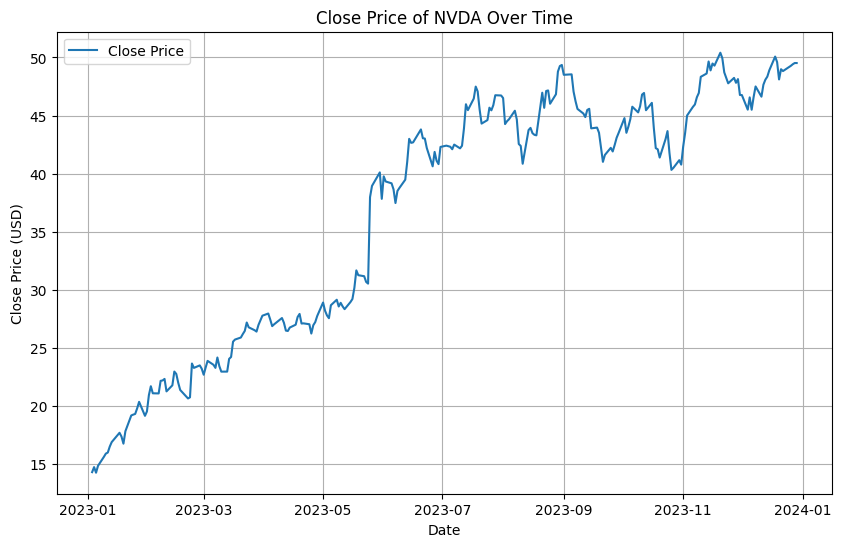

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(data.index, data["Close_NVDA"], label="Close Price")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.title("Close Price of NVDA Over Time")
plt.legend()
plt.grid()
plt.show()

---

In [ ]:
# Analiza danych – sprawdzenie zakresu i jakości danych (częstotliwość, wartości odstające, rozkład).
# Kalkulacja VaR – przy założeniu normalnego rozkładu (trzeba dopasować mu i sigma) oraz dla rozkładu historycznego z danych.
# Krótkie podsumowanie wyników – word, powerpoint lub dobrze skomentowany i opisany kod programistyczny.


# stopa zwrotu
# zysk lub starta

# dane do zyskow i strat, mamy powiedziec co chcemy liczyc, cos tam z var, test na rozklad normalny, komentarzy duzo co widzimy na wykresach

In [ ]:
# Logarytmiczna stopa zwrotu jest preferowana przy analizach ryzyka, np. przy obliczaniu Value at Risk (VaR), ponieważ zapewnia addytywność.
# Przy dużych zyskach/stratach różnica między stopą prostą a logarytmiczną może być znacząca.